In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import json
from pandas.io.json import json_normalize
import sys
!{sys.executable} -m pip install jellyfish
import jellyfish

In [24]:
DATA_PATH='../data'
RECIPES1M_SMALL_FILE='recipes1M_small'
# options are recipe_pineapple.json and recipe_salmon.json

In [21]:
dataset_path = os.path.join(DATA_PATH, RECIPES1M_SMALL_FILE, 'recipe_pineapple.json')
df = pd.read_json(dataset_path, orient='index')

In [22]:
df.head()

,id,ingredients,instructions,partition,title,url
0000631d90,0000631d90,"[{'text': '1/2 cup shredded coconut'}, {'text'...","[{'text': 'In a large skillet, toast the cocon...",train,Easy Tropical Beef Skillet,http://www.food.com/recipe/easy-tropical-beef-...
0000ed95f8,0000ed95f8,"[{'text': '1/4 cup butter'}, {'text': '3/4 cup...","[{'text': 'Cream butter, sugar and egg.'}, {'t...",train,Pineapple Loaf,http://www.food.com/recipe/pineapple-loaf-88070
0007cacb2d,0007cacb2d,[{'text': '1 (3 ounce) package lemon Jell-O ge...,[{'text': 'Use 3/4 cup boiling water to dissol...,train,Lemon Gelatin N Fruit Salad,http://www.food.com/recipe/lemon-gelatin-n-fru...
0009dae0d8,0009dae0d8,"[{'text': '2 cups sugar'}, {'text': '3 eggs'},...","[{'text': 'Preheat oven to 350*.'}, {'text': '...",test,Zucchini Carrot Spice Muffins,http://www.food.com/recipe/zucchini-carrot-spi...
000c364a4a,000c364a4a,"[{'text': '8 ounces cream cheese'}, {'text': '...",[{'text': 'Mix the butter and the cream cheese...,train,Aunt Julie's Pineapple Cookies,http://www.food.com/recipe/aunt-julies-pineapp...


In [54]:
all_ingredients_lines = []
raw_ingredients = df[['ingredients']].values
for ri in raw_ingredients:
    for i in ri[0]:
        all_ingredients_lines += [i['text']]

In [102]:
import re

def append_lines_to_words(lines, words):
    for line in lines:
        words += re.sub('[^a-z ]', '', line.lower()).split(' ')

all_ingredients_words = []
append_lines_to_words(all_ingredients_lines, all_ingredients_words)
all_ingredients_words, all_ingredients_words_count = np.unique(all_ingredients_words, return_counts=True)
count_sort_ind = all_ingredients_words_count.argsort()
all_ingredients_words = all_ingredients_words[count_sort_ind[::-1]]
all_ingredients_words_count = all_ingredients_words_count[count_sort_ind[::-1]]
#print(all_ingredients_words[:500])
#print(all_ingredients_words_count[:10])

In [103]:
exclusion_list = ['', 'cup', 'ounce', 'cups', 'teaspoon', 'juice', 'tablespoons', 'chopped', 'can', 'or', 'ounces', 'fresh', 'and', 'crushed', 'tablespoon', 'drained', 'teaspoons', 'sauce', 'sliced', 'cut', 'ground', 'into', 'brown', 'chunks', 'red', 'c', 'in', 'peeled', 'diced', 'large', 'to', 'inch', 'minced', 'green', 'powder', 'white', 'of', 'oz', 'whole', 'for', 'baking', 'tbsp', 'optional', 'lb', 'package', 'frozen', 'finely', 'mix', 'tsp', 'slices', 'extract', 'small', 'grated', 'medium', 'canned', 'shredded', 'ml', 'softened', 'pieces', 'vegetable', 'light', 'black', 'cloves', 'unsweetened', 'cooked', 'packed', 'bell', 'taste', 'with', 'allpurpose', 'whip', 'whipped', 'dried', 'syrup', 'thawed', 'cake',  'jello', 'about', 'garnish', 'cilantro', 'gelatin', 'cubes', 'g', 'each', 'boneless', 'pound', 'cans', 'toasted', 'the', 'cool', 'topping', 'leaves', 'pudding', 'sweet', 'dark', 'cored', 'fluid', 'lbs', 'sour', 'seeded', 'undrained', 'instant', 'melted', 'ripe', 'tidbits', 'dry', 'as', 'use', 'chilled', 'thinly', 'a', 'cubed', 'divided', 'box', 'beaten', 'x', 'pkg', 'yellow', 'removed', 'fruit', 'halved', 'sweetened', 'well', 'freshly', 'cold', 'hot', 'powdered', 'flaked', 'skinless', 'liquid', 'granulated', 'container', 'nutmeg', 'i', 'concentrate', 'pie', 'boiling', 'unsalted', 'mint', 'breasts', 'packages', 'plus', 'pinch', 'seeds', 'zest', 'reserved', 'candied', 'ham', 'lowfat', 'if', 'from', 'clove', 'dash', 'size', 'coarsely', 'heavy', 'strips', 'slice', 'not', 'more', 'liqueur', 'chunk', 'room', 'thick', 'miniature', 'seedless', 'bottle', 'half', 'halves', 'pounds', 'pint', 'rings', 'temperature', 'jar', 'breast', 'plain', 'graham', 'thin', 'your', 'whipping', 'kosher', 'wedges', 'possibly', 'quart', 'ale', 'prepared', 'flavor', 'fat', 'wheat', 'cracker', 'filling', 'kraft', 'dressing', 'cooking', 'pitted', 'weight', 'golden', 'quartered', 'reserve', 'you', 'up', 'recipe', 'such', 'stick', 'confectioners', 'crumbs', 'free', 'thru', 'one', 'allspice', 'peel', 'fine', 'broth', 'mashed', 'condensed', 'food', 'mixed', 'liter', 'worcestershire', 'serving', 'substitute', 'preserves', 'at', 'on', 'seasoning', 'whites', 'flavored', 'paste', 'extra', 'lightly', 'parsley', 'barbecue', 'crust', 'firmly', 'sticks', 'spray', 'lengthwise', 'baby', 'quarts', 'cabbage', 'dijon', 'is', 'sifted', 'cottage', 'squeezed', 'needed', 'low', 'qt', 'brandy', 'like', 'fatfree', 'nectar', 'juiced', 'used', 'nonfat', 'rind', 'roasted', 'drink', 'sea', 'grams', 'carton', 'leaf', 'drain', 'angel', 'very', 'yolks', 'slivered', 'any', 'uncooked', 'pure', 'sugarfree', 'trimmed', 'sherbet', 'cocktail', 'raw', 'deveined', 'original', 'bag', 'dice', 'desired', 'other', 'fillets', 'sodium', 'mini', 'chops', 'follows', 'chips', 'splenda', 'brand', 'stock', 'seed', 'rinsed', 'bunch', 'lean', 'grm', 'firm', 'soft', 'carbonated', 'by', 'split', 'shortening', 'sprigs', 'roughly', 'see', 'cube', 'sm', 'do', 'all', 'beverage', 'pizza', 'italian', 'evaporated', 'triple', 'sec', 'spice', 'blue', 'bottles', 'tenderloin', 'slightly', 'safeway', 'salsa', 'head', 'steaks', 'preferably', 'ribs', 'separated', 'it', 'smoked', 'grnd', 'loin', 'piece', 'dole', 'warm', 'recommended', 'but', 'jelly', 'called', 'no', 'unflavored', 'fruits', 'unpeeled', 'frying']
ingredients_500 = np.setdiff1d(all_ingredients_words[:500], exclusion_list)
print(ingredients_500)
print(len(ingredients_500))

['almond' 'almonds' 'apple' 'apples' 'applesauce' 'apricot' 'apricots'
 'avocado' 'bacon' 'banana' 'bananas' 'basil' 'bean' 'beans' 'beef'
 'berry' 'blueberries' 'bread' 'breadcrumbs' 'buns' 'butter' 'buttermilk'
 'canola' 'cantaloupe' 'carrot' 'carrots' 'cayenne' 'celery' 'cheddar'
 'cheese' 'cherries' 'cherry' 'chestnuts' 'chicken' 'chile' 'chiles'
 'chili' 'chipotle' 'chocolate' 'cider' 'cinnamon' 'coconut' 'coriander'
 'corn' 'cornstarch' 'crackers' 'cranberries' 'cranberry' 'cream'
 'cucumber' 'cumin' 'curacao' 'curry' 'dates' 'egg' 'eggs' 'fish' 'flakes'
 'flour' 'garlic' 'ginger' 'gingerroot' 'grape' 'grapefruit' 'grapes'
 'grenadine' 'honey' 'ice' 'jalapeno' 'ketchup' 'kiwi' 'lemon' 'lemonade'
 'lemonlime' 'lemons' 'lettuce' 'lime' 'limes' 'macadamia' 'malibu'
 'mandarin' 'mango' 'mangoes' 'maple' 'maraschino' 'margarine'
 'marshmallow' 'marshmallows' 'mayonnaise' 'melon' 'milk' 'molasses'
 'mozzarella' 'mushrooms' 'mustard' 'noodles' 'nuts' 'oats' 'oil' 'olive'
 'onion' 'onion

In [104]:
ingredients_double = []
threshold=0.9
for indx, i in enumerate(ingredients_500):
    for j in ingredients_500[(indx+1):]:
        if jellyfish.jaro_distance(i,j) > threshold:
            print('removing', j, 'keeping', i)
            ingredients_double += [j]
ingredients_filtered = np.setdiff1d(ingredients_500, ingredients_double)
print(len(ingredients_filtered))

removing almonds keeping almond
removing apples keeping apple
removing apricots keeping apricot
removing bananas keeping banana
removing beans keeping bean
removing carrots keeping carrot
removing chiles keeping chile
removing eggs keeping egg
removing grapes keeping grape
removing rice keeping ice
removing lemons keeping lemon
removing limes keeping lime
removing mangoes keeping mango
removing marshmallows keeping marshmallow
removing onions keeping onion
removing oranges keeping orange
removing peaches keeping peach
removing peanuts keeping peanut
removing peas keeping pears
removing pecans keeping pecan
removing peppers keeping pepper
removing tomatoes keeping tomato
136


In [115]:
def parse_ingredients_words(data):
    lines = []
    for insert in data:
        lines += [insert['text']]
    words = []
    append_lines_to_words(lines, words)
    return np.setdiff1d(words, exclusion_list)

transformed_df = df['ingredients'].apply(parse_ingredients_words)
#transformed_df.index
#transformed_df.values

Index(['0000631d90', '0000ed95f8', '0007cacb2d', '0009dae0d8', '000c364a4a',
       '000d5e4996', '000f31efed', '00111b70f6', '0013894a19', '00141df42c',
       ...
       'ffdb3f64f2', 'ffdeb48607', 'ffe16dbe80', 'ffe2f5b61e', 'ffe5b4b038',
       'ffe69a4b42', 'ffecc4f6c8', 'fff3cf4fd0', 'fff787905b', 'fffcb1da87'],
      dtype='object', length=23052)

In [127]:
ingredients_matrix = np.zeros((len(transformed_df.values), len(ingredients_filtered)))
for i, composition in enumerate(transformed_df.values):
    for j, ingredient in enumerate(ingredients_filtered):
        for content in composition:
            if jellyfish.jaro_distance(content, ingredient) > threshold:
                ingredients_matrix[i,j] = 1


In [144]:
print('checksum')
nb_recipes_to_show=5
nb_ingredients_to_show=50
ingredients_demo = ingredients_filtered[:nb_ingredients_to_show]
demo = zip(
    df.loc[transformed_df.index[:nb_recipes_to_show],:][['title']].values,
    ingredients_matrix[:nb_recipes_to_show, :nb_ingredients_to_show]
)
for title, ingredients in demo:
    print('***', title[0], '***')
    print(ingredients_demo[ingredients == 1])


checksum
*** Easy Tropical Beef Skillet ***
['beef' 'coconut' 'cornstarch']
*** Pineapple Loaf ***
['butter' 'egg']
*** Lemon Gelatin N Fruit Salad ***
['cheese']
*** Zucchini Carrot Spice Muffins ***
['apple' 'carrot' 'cinnamon' 'egg']
*** Aunt Julie's Pineapple Cookies ***
['butter' 'cheese' 'cream']


In [148]:
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE, Isomap
from sklearn.manifold import TSNE

#embeddings = [PCA(n_components=2, copy=True, whiten=True, tol=1e-5), Isomap(n_components=2, n_neighbors=5), TSNE(n_components=2)]
embedding = TSNE(n_components=2)

X_embedded = embedding.fit_transform(ingredients_matrix)

NameError: name 'y_mnist' is not defined

<Figure size 432x288 with 0 Axes>

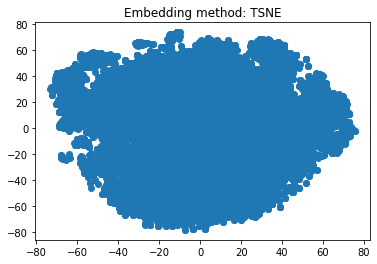

In [150]:
fig = plt.figure()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
#plt.legend()
plt.title('Embedding method: '+ type(embedding).__name__)
plt.show()

> Note: The following is just for visualization. As the class salty/desert is computed from the list of ingredients, showing the relation between ingredients information and salty/desert class will obviously have good results. A snake biting its own tail.

In [158]:
# -1: desert/sugar, 0: neutral, 1: meal/salted
ingredients_class = np.array([
    0,0,0,-1,1,1,0,1,1,1,-1,-1,0,-1,1,0,0,0,0,1,1,1,1,1,-1,-1,0,1,1,1,1,-1,0,-1,0,1,
    0,0,0,-1,-1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,-1,0,0,0,1,-1,0,0,0,1,0,-1,0,-1,0,-1,
    0,0,-1,1,0,0,0,1,1,1,1,0,0,0,1,1,-1,1,-1,0,1,-1,0,-1,0,1,1,0,1,1,0,-1,-1,0,1,0,
    0,0,0,-1,1,0,0,0,1,1,-1,-1,-1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
])
recipes_class = np.empty((ingredients_matrix.shape[0],))
for i, recipe in enumerate(ingredients_matrix):
    recipes_class[i] = np.mean(ingredients_class[recipe == 1])

In [160]:
print('checksum')
nb_recipes_to_show=10
demo = zip(
    df.loc[transformed_df.index[:nb_recipes_to_show],:][['title']].values,
    recipes_class[:nb_recipes_to_show]
)
for title, c in demo:
    print(title, c)

checksum
['Easy Tropical Beef Skillet'] 0.0
['Pineapple Loaf'] -0.2222222222222222
['Lemon Gelatin N Fruit Salad'] 0.2857142857142857
['Zucchini Carrot Spice Muffins'] -0.07692307692307693
["Aunt Julie's Pineapple Cookies"] 0.0
["Rob and Lisa's Island-Escape Salad"] 0.0
['Stuffed Papaya Boats'] -0.16666666666666666
['Pineapple Marinade'] 0.3333333333333333
["Bride's Pink Punch Recipe"] -0.5
['Pineapple Chicken'] 0.2


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


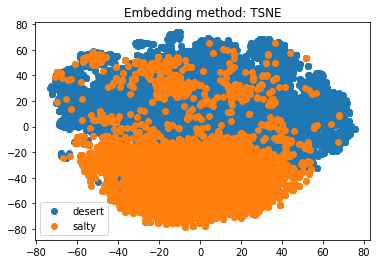

In [164]:
fig = plt.figure()
classes = [
    ('desert', recipes_class<=0),
    ('salty', recipes_class>0)
]
for name, mask in classes:
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=name)
plt.legend()
plt.title('Embedding method: '+ type(embedding).__name__)
plt.show()